In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/adf-result/adf_results.csv')

In [3]:
# Function to summarize ADF test results
def summarize_adf_results(df):
    # Count p-values < 0.05
    p_value_count_less = (df['p-value'] < 0.05).sum()
    p_value_count_greater = (df['p-value'] > 0.05).sum()

    # Count ADF Statistic < Critical Values
    critical_value_1_count = (df['ADF Statistic'] < df['Critical Value 1%']).sum()
    critical_value_5_count = ((df['ADF Statistic'] < df['Critical Value 5%']) & (df['ADF Statistic'] > df['Critical Value 1%'])).sum()
    critical_value_10_count = ((df['ADF Statistic'] < df['Critical Value 10%']) & (df['ADF Statistic'] > df['Critical Value 5%'])).sum()

    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Metric': ['p-value < 0.05', 'p-value > 0.05', 'ADF Statistic < Critical Value 1%', 'ADF Statistic < Critical Value 5%', 'ADF Statistic < Critical Value 10%'],
        'Count': [p_value_count_less, p_value_count_greater, critical_value_1_count, critical_value_5_count, critical_value_10_count]
    })

    return summary

In [4]:
# Get the summary
summary = summarize_adf_results(data)

# Print the summary
display(summary)

,Metric,Count
0,p-value < 0.05,392
1,p-value > 0.05,1
2,ADF Statistic < Critical Value 1%,390
3,ADF Statistic < Critical Value 5%,2
4,ADF Statistic < Critical Value 10%,0


In [5]:
data[data['p-value'] > 0.05]

,MaterialCode,ADF Statistic,p-value,Critical Value 1%,Critical Value 5%,Critical Value 10%
388,10128891,26.683433,1.0,-3.439516,-2.865585,-2.568924


**p-value < 0.05:**
> * **Count**: 392
> * **Observation**: There are 392 materials for which the p-value is less than 0.05. This indicates that for these materials, we reject the null hypothesis at the 5% significance level, suggesting that the time series for these materials are likely stationary.

**p-value > 0.05:**
> * **Count**: 1
> * **Observation**: A p-value greater than 0.05 indicates that there is not enough evidence to reject the null hypothesis of non-stationarity. This means the time series is likely non-stationary.

**ADF Statistic < Critical Value 1%:**
> * **Count**: 390
> * **Observation**: There are 390 materials for which the ADF statistic is less than the critical value at the 1% significance level. This indicates strong evidence of stationarity for these materials.

**ADF Statistic < Critical Value 5%:**
> * **Count**: 2
> * **Observation**: There are 2 materials for which the ADF statistic is less than the critical value at the 5% significance level but greater than the critical value at the 1% significance level. This indicates that for these materials, we reject the null hypothesis at the 5% significance level but not at the 1% significance level, suggesting moderate evidence of stationarity.

**ADF Statistic < Critical Value 10%:**
> * **Count**: 0
> * **Observation**: There are 0 materials for which the ADF statistic is less than the critical value at the 10% significance level but greater than the critical value at the 5% significance level. This indicates that no materials fall into this category, suggesting that the materials either meet stricter criteria or do not meet the 10% significance level criterion.

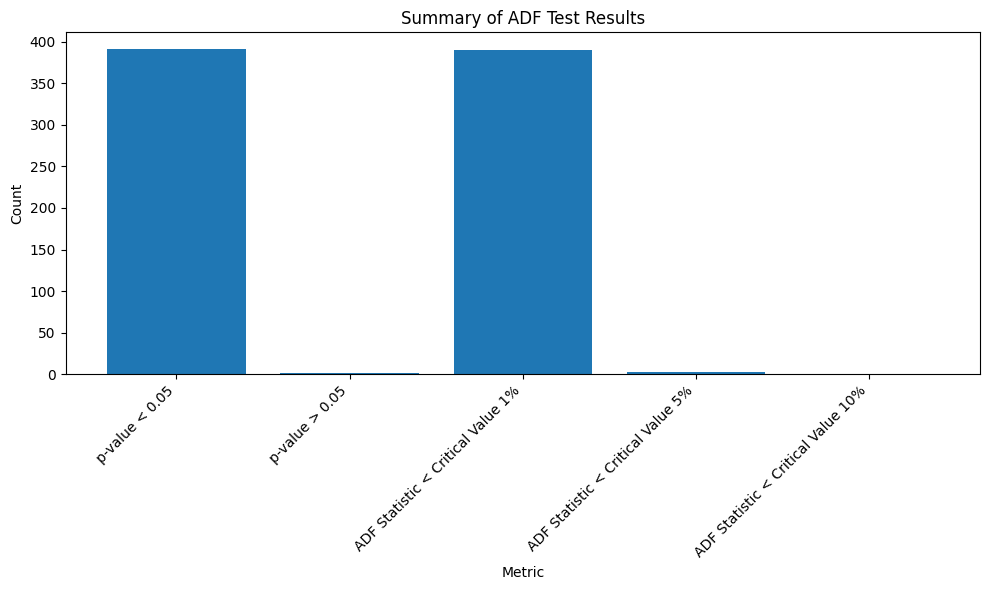

In [6]:
# Plot the summary
plt.figure(figsize=(10, 6))
plt.bar(summary['Metric'], summary['Count'])
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Summary of ADF Test Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
